In [ ]:
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]


4052739537881

In [ ]:
@memoized
def fiboMemo(n): return 1 if n<1 else fiboMemo(n-1)+fiboMemo(n-2)
fiboMemo(60)

4052739537881

#Get change


In [ ]:
%%writefile changeDP.py
# Uses python3
import sys
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]

@memoized
def get_change(value):
  if(value==0):return 0
  myMin = -1
  for coin in [1,3,4]:
    if (myMin<0 or (coin<=value and get_change(value-coin)+1 < myMin)):
      myMin = get_change(value-coin)+1
    
  return myMin

if __name__ == '__main__':
      
    m = int(sys.stdin.read())
    # for i in range(m):
    #   get_change(i)
    print(get_change(m))


Overwriting changeDP.py


In [ ]:
%%writefile changeDPtest.txt 
120

Overwriting changeDPtest.txt


In [ ]:
!python3 changeDP.py < changeDPtest.txt

30


#Edit distance


In [ ]:
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]


In [ ]:
str1="-editing"
str2="-distance"
@memoized
def editDistance(tuple):
  i,j = tuple
  # print(f"i {i}")
  # print(f"j {j}")
  if(i<0 or j<0): 
    # print("done")
    return 1<<10
  if(i==0):return j
  if(j==0):return i
  # print("trying")
  myMin = 1<<10
  inplace = editDistance((i-1,j-1)) + (1 if(str1[i]!=str2[j]) else 0)
  deletion = editDistance((i-1,j)) + 1
  insertion = editDistance((i,j-1)) + 1
  return min(min(min(myMin,inplace),deletion),insertion)

myMatrix = [[0 for _ in range(len(str2))] for _ in range(len(str1))]
for i in range(len(str1)):
  for j in range(len(str2)):
    myMatrix[i][j] = editDistance((i,j))

    
for i in range(len(myMatrix)): print(myMatrix[i])


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1, 1, 2, 3, 4, 5, 6, 7, 7]
[2, 1, 2, 3, 4, 5, 6, 7, 8]
[3, 2, 1, 2, 3, 4, 5, 6, 7]
[4, 3, 2, 2, 2, 3, 4, 5, 6]
[5, 4, 3, 3, 3, 3, 4, 5, 6]
[6, 5, 4, 4, 4, 4, 3, 4, 5]
[7, 6, 5, 5, 5, 5, 4, 4, 5]


In [ ]:
%%writefile editDistance.py
# Uses python3
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]

@memoized
def editDistance(tuple):
  i,j = tuple
  # print(f"i {i}")
  # print(f"j {j}")
  if(i<0 or j<0): 
    # print("done")
    return 1<<10
  if(i==0):return j
  if(j==0):return i
  # print("trying")
  myMin = 1<<10
  inplace = editDistance((i-1,j-1)) + (1 if(str1[i]!=str2[j]) else 0)
  deletion = editDistance((i-1,j)) + 1
  insertion = editDistance((i,j-1)) + 1
  return min(min(min(myMin,inplace),deletion),insertion)


def aux(s,t):

  myMatrix = [[0 for _ in range(len(str2))] for _ in range(len(str1))]
  for i in range(len(str1)):
    for j in range(len(str2)):
      myMatrix[i][j] = editDistance((i,j))
  return myMatrix[-1][-1]

if __name__ == "__main__":
  str1 = "-" + input()
  str2 = "-" + input()
  print(aux(str1,str2))


Overwriting editDistance.py


In [ ]:
%%writefile editDistanceTester.txt 
short
ports


Overwriting editDistanceTester.txt


In [ ]:
!python editDistance.py < editDistanceTester.txt

3


#Longest subsequence


In [ ]:
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]


In [ ]:
def LCS(tuple):
  i,j = tuple
  if(i == 0 or j==0): return 0
  if str1[i]==str2[j]: return LCS((i-1,j-1))
  if str1[i]!=str2[j]: return max(LCS((i,j-1)),LCS((i-1,j))) 
LCS((0,4))

0

In [ ]:
%%writefile lcs2.py
import sys
# Uses python3
class memoized():
  def __init__(self,f):
    self.memo = {}
    self.f = f
  def __call__ (self,*inputv):
    outputCandidate = self.memo.get(inputv)
    if (outputCandidate != None): 
      return outputCandidate
    else: 
      self.memo[inputv]=self.f(*inputv)
      return self.memo[inputv]

@memoized
def lcs2(tuple):
  i,j = tuple
  if(i == 0 or j==0): return 0
  if str1[i-1]==str2[j-1]: return lcs2((i-1,j-1)) + 1
  if str1[i-1]!=str2[j-1]: return max(lcs2((i,j-1)),lcs2((i-1,j))) 

def aux(s,t):
  # print(str1)
  # print(str2)
  myMatrix = [[0 for _ in range(len(str2)+1)] for _ in range(len(str1)+1)]
  for i in range(len(str1)+1):
    for j in range(len(str2)+1):
      myMatrix[i][j] = lcs2((i,j))
  # print(myMatrix)
  
  return myMatrix[-1][-1]

if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))

    n = data[0]
    data = data[1:]
    a = data[:n]

    data = data[n:]
    m = data[0]
    data = data[1:]
    b = data[:m]
    str1=a
    str2=b

    print(aux(0,0))


Overwriting lcs2.py


In [ ]:
%%writefile lcs2Test.txt 
100
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
100
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


Overwriting lcs2Test.txt


In [ ]:
!python lcs2.py <lcs2Test.txt

100


#ScreenShots

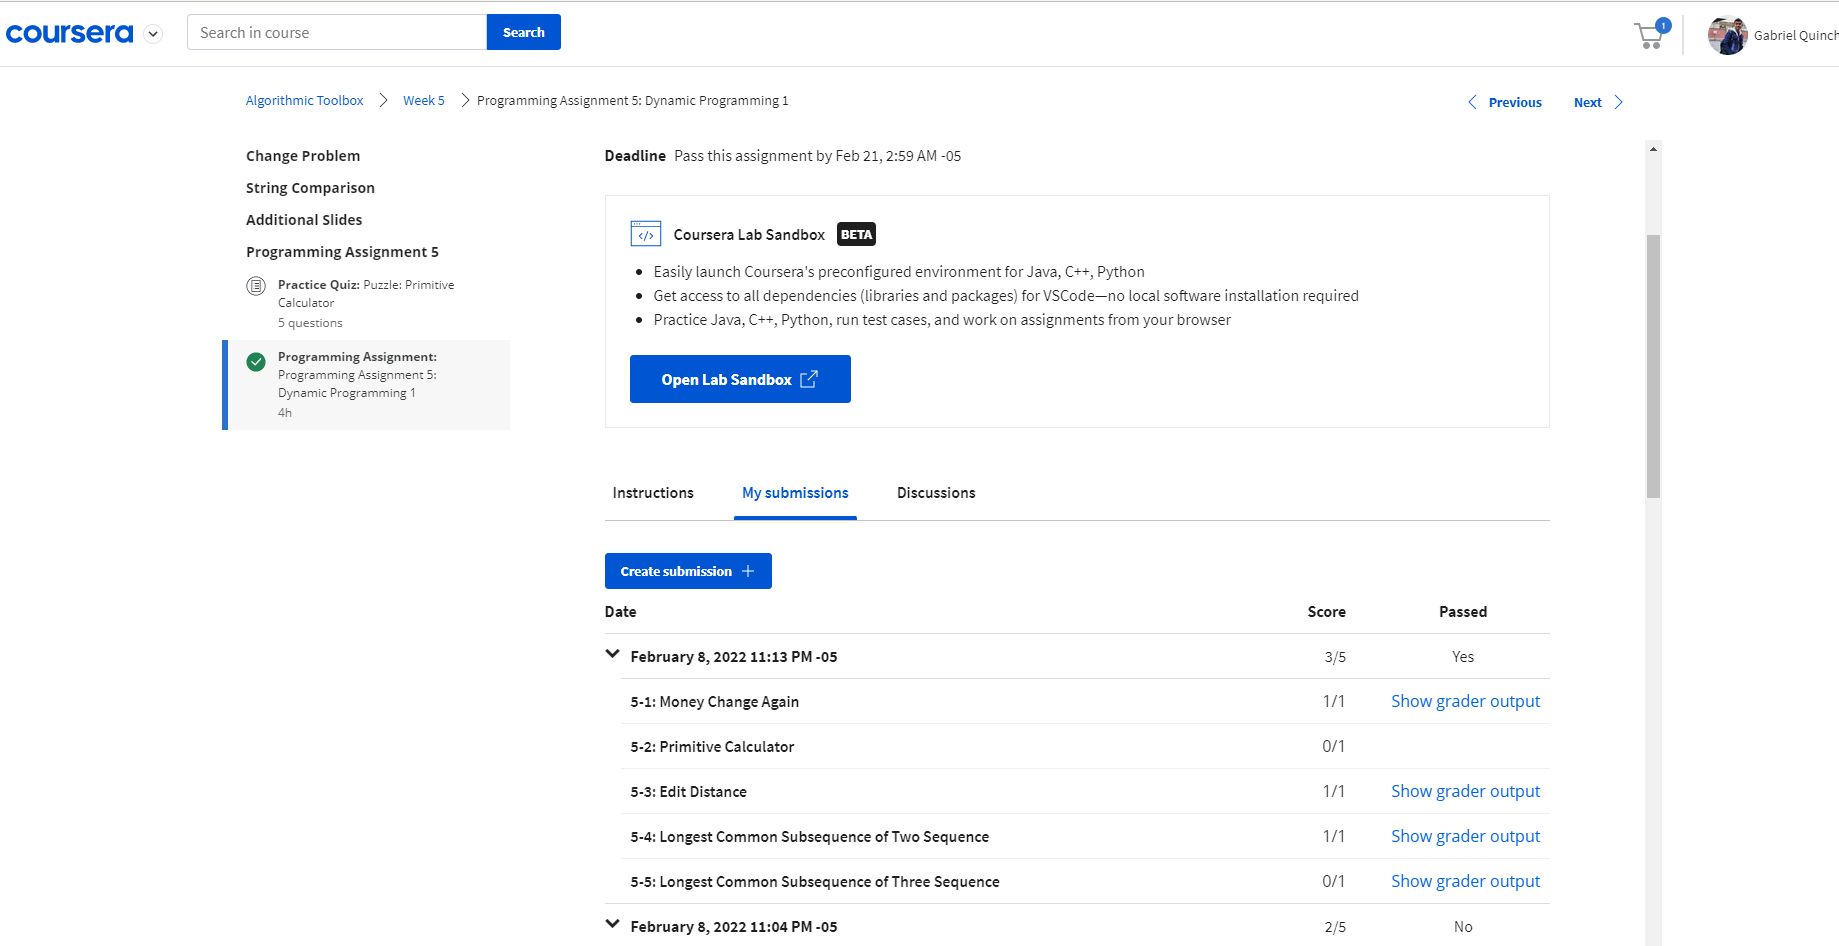